In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")

# DATA ANALYSIS

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
#Total 9 columns- 8 features and 1 target("Rings")
#Categorical feature-sex
#Continuous features-Length,Diameter,Height, Whole Weight,Shucked Weight,Viscera Weight, Shell Weight
#Target is categorical
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
df.shape

(4177, 9)

In [9]:
#Checking null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

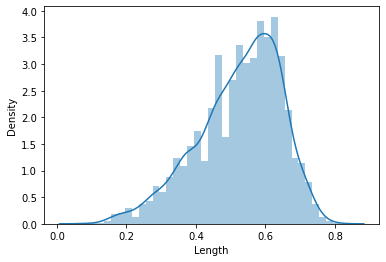

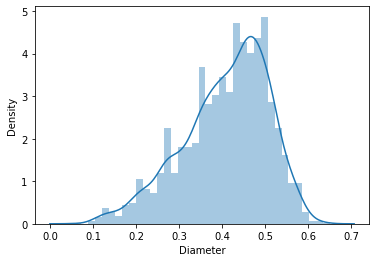

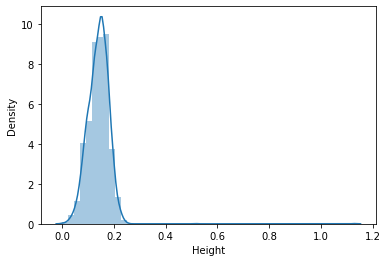

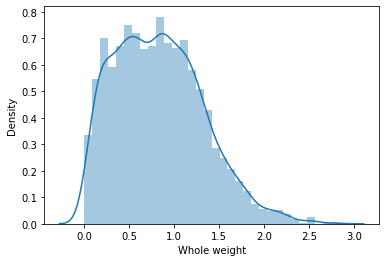

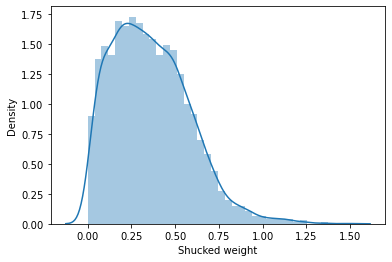

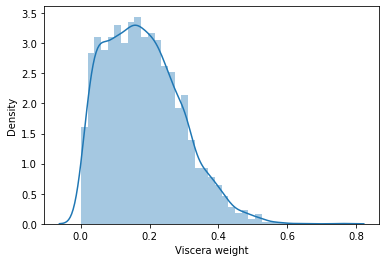

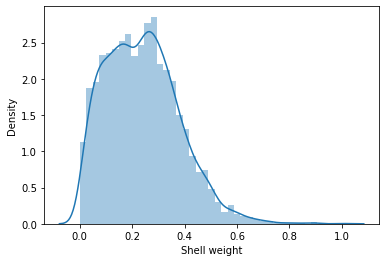

In [62]:
sns.distplot(df["Length"])
plt.show()

sns.distplot(df["Diameter"])
plt.show()

sns.distplot(df["Height"])
plt.show()

sns.distplot(df["Whole weight"])
plt.show()

sns.distplot(df["Shucked weight"])
plt.show()

sns.distplot(df["Viscera weight"])
plt.show()

sns.distplot(df["Shell weight"])
plt.show()

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

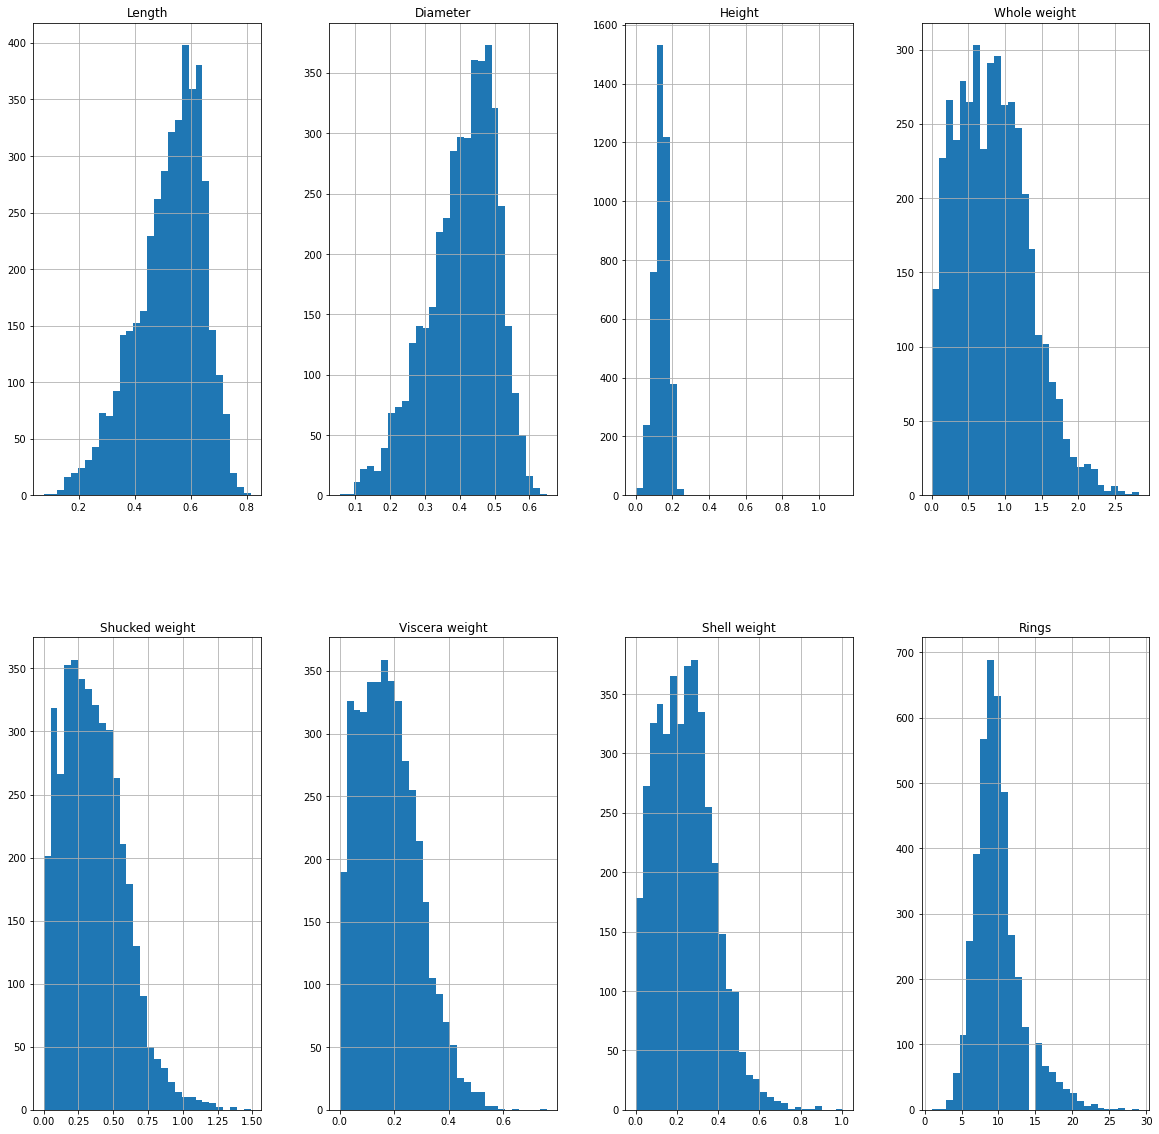

In [10]:
#Histogram to check the data distribution of variable
df.hist(figsize=(20,20), grid = True, layout = (2,4), bins = 30)

In [11]:
df["Sex"].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

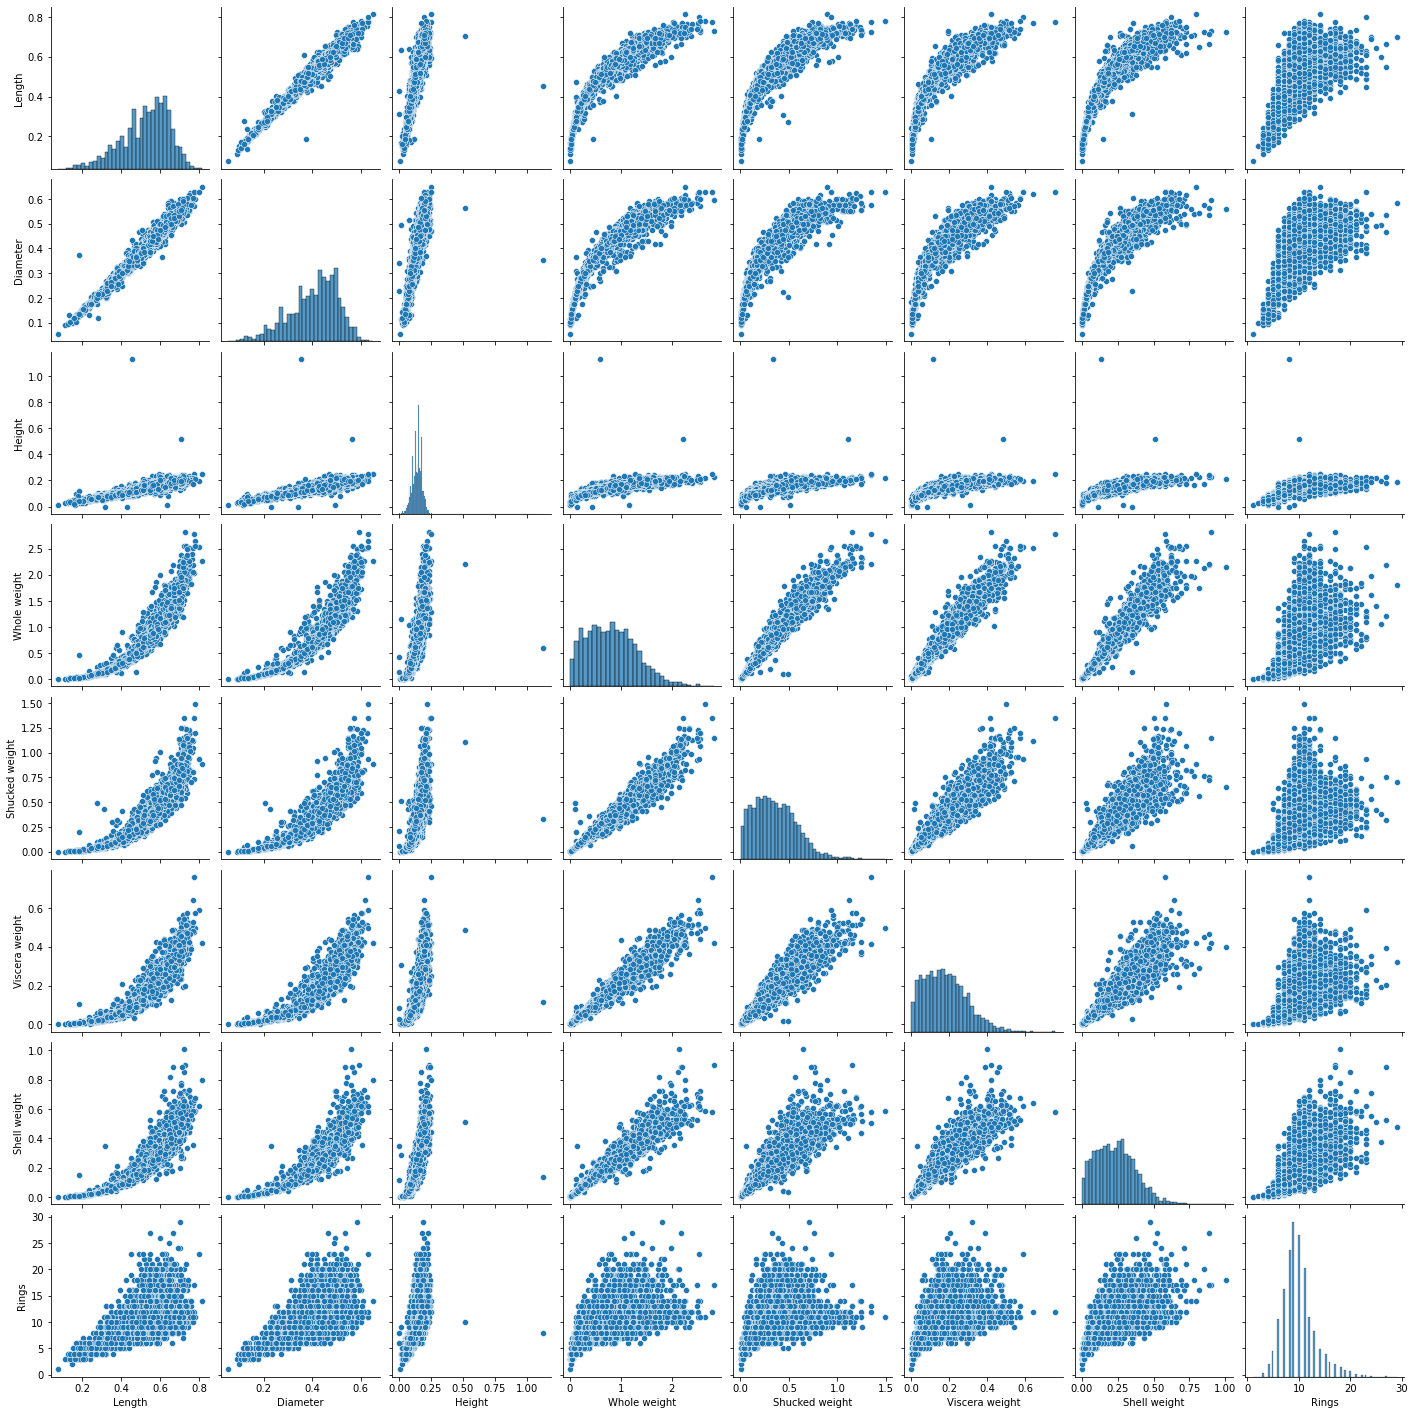

In [12]:
sns.pairplot(df)
plt.show()

In [34]:
df.head(20)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [119]:
df.corr().Rings.sort_values(ascending=False) Diameter


Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64

<AxesSubplot:>

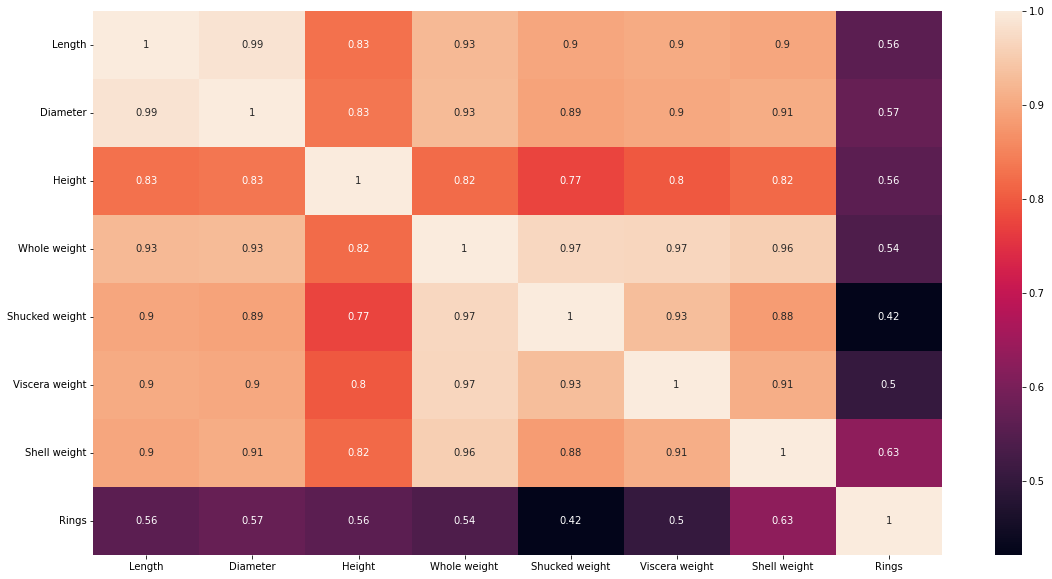

In [15]:
#Checking the correlation of the dataset by plotting heatmap
plt.figure(figsize=[19,10])
sns.heatmap(df.corr(),annot=True)

In [20]:
for i1 in range(len(df.corr().columns)):
    for i2 in range(i1):
        if abs(df.corr().iloc[i1,i2])>0.95:
            name=df.corr().columns[i1]
            print(name)

Diameter
Shucked weight
Viscera weight
Shell weight


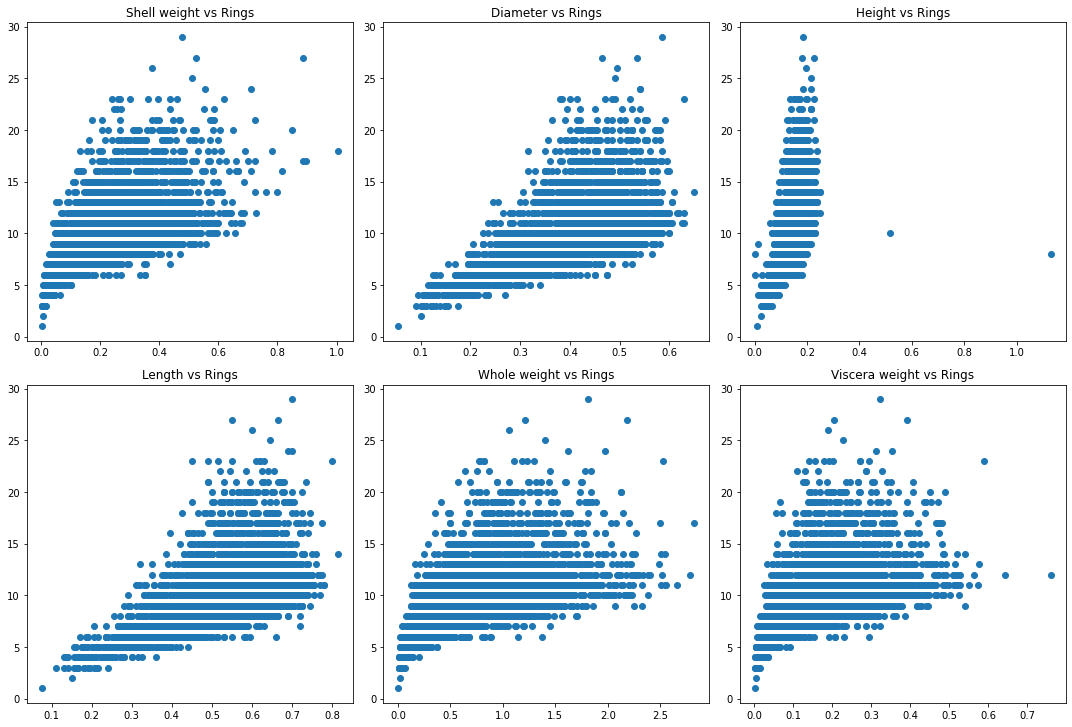

In [37]:
plt.figure(figsize=(15, 15))

plt.subplot(3,3,1)
plt.title('Shell weight vs Rings')
plt.scatter(df['Shell weight'],df['Rings'])

plt.subplot(3,3,2)
plt.title('Diameter vs Rings')
plt.scatter(df['Diameter'],df['Rings'])

plt.subplot(3,3,3)
plt.title('Height vs Rings')
plt.scatter(df['Height'],df['Rings'])

plt.subplot(3,3,4)
plt.title('Length vs Rings')
plt.scatter(df['Length'],df['Rings'])

plt.subplot(3,3,5)
plt.title('Whole weight vs Rings')
plt.scatter(df['Whole weight'],df['Rings'])

plt.subplot(3,3,6)
plt.title('Viscera weight vs Rings')
plt.scatter(df['Viscera weight'],df['Rings'])

plt.tight_layout()

In [9]:
df["Rings"].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

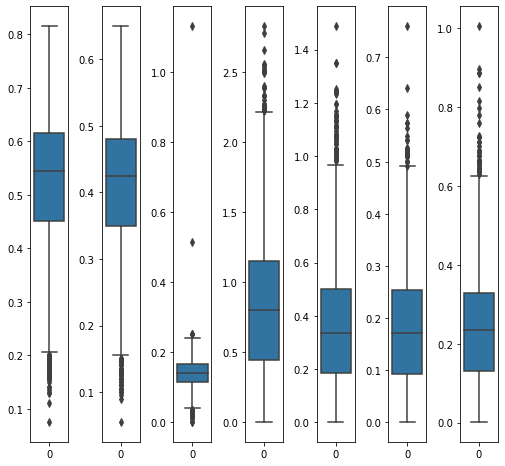

In [11]:
import warnings
warnings.filterwarnings("ignore")

columnlist=df.columns[1:8].values
ncol=30
nrows=14

#Plotting box plots for the features-Length,Diameter, Height, Whole Weight, Shucked Weight, Viscera Weight, Shell Weight
plt.figure(figsize=(ncol, 3*ncol))
for i in range(0, len(columnlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[columnlist[i]])
    plt.tight_layout()

# Summary of Data Analysis

In [ ]:
# 1. From the data analysis, it is clear that dataset has 9 columns and 4177 entries.
# 2. The data set has 9 variables, 8 features- sex,length, diameter, height, whole weight, shucked weight, viscera weight, shell weight
#    and 1 target- rings
# 3. Out of the 8 features, all features are continuous in nature except "Sex" which has the following attributes- Male, Female,Infant
# 4. Features-Length, Diamter, Height, Whole Weight, Shucked Weight, Viscera Weight, Shell Weight are of data type float and 
#    feature-Sex is of object data type, target is of integer data type.
# 5. There are no null values in the data set.
# 6. After plotting the distribution plots of all the features, it is evident that the data is skewed and not following normal distribution.
# 7. On plotting the histogram of the target, it is observed that the Rings are mostly distributed in the range of 5-12.
# 8. After checking the correlation, the features-Diameter,Shucked weight, Viscera weight,Shell weight have the highest correlation
#    with the cut off being 0.95.
# 9. The features with highest correlation with the target are-Shell Weight, Diameter,Height,Length.
# 10.To check the outliers using the box plot, the features with outliers are- Height, Whole Weight, Shucked Weight, Viscera Weight,
#    Shell Weight

# Data Cleaning

In [12]:
# From the above box plots,it is clear that the features having outliers are- Height, Shucked Weight, Viscera Weight, Shell Weight

#Checking Z-Score for Outliers
from scipy import stats
columnlist1=df.columns[1:8].values
z1=abs(stats.zscore(df[columnlist1]))

In [13]:
#Removing Outliers
samp_z=df[(z1 < 3).all(axis=1)]

In [14]:
samp_z

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [15]:
#Comparing the shape of the data with outliers and without outliers
df.shape,samp_z.shape

((4177, 9), (4084, 9))

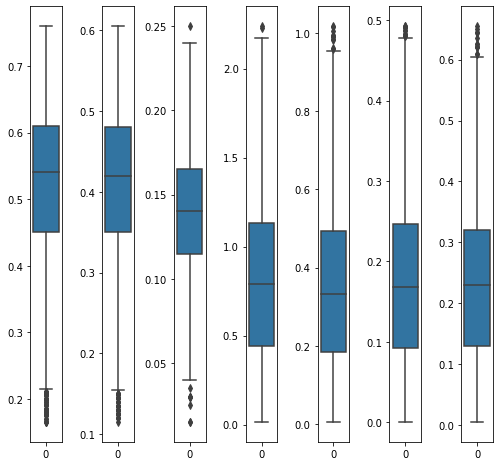

In [17]:
#Plotiing data after removing outliers

plt.figure(figsize=(ncol, 3*ncol))
for i in range(0, len(columnlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=samp_z[columnlist[i]])
    plt.tight_layout()

In [19]:
#Encoding the categorical feature-Sex

abalone_encode=pd.get_dummies(data=samp_z["Sex"],drop_first=True)

data_frame= samp_z.drop("Sex",axis = 1)
data_frame= abalone_encode.join(data_frame)
data_frame

,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,0,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [20]:
#Splitting Features and Target from the dataset
X=data_frame.iloc[:,:9]
Y=data_frame[["Rings"]]

In [27]:
X

,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...,...
4172,0,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_bar=X.drop(columns=["Shucked weight","Viscera weight","Shell weight"],axis=1) 

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_bar.columns

# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(X_bar.values, i)
                          for i in range(len(X_bar.columns))]

print(vif_data)

#As per previous correlation results-Diameter,Shucked weight,Viscera weight,Shell weight are highly correlated

        feature         VIF
0             I    2.511691
1             M    2.086790
2        Length  709.894912
3      Diameter  747.953085
4        Height   84.889575
5  Whole weight   18.000652


In [33]:
# We need to scale the data before feeding it to the model
# To standardize our data, we need to import the StandardScaler from the sklearn library

from sklearn.preprocessing import StandardScaler 

scale=StandardScaler()

X1=scale.fit_transform(X)

# Summary of Data Cleaning

In [ ]:
# 1. The outliers are removed using z-score and box plot is plotted again.
# 2. The categorised feature-"sex" is encoded.
# 3. The data is split into features and target.
# 4. Checking the Variance Inflation Factor, it is observed that when features-Shucked weight,Viscera weight,Shell weight
#    are removed, the VIF is improved.

# Logistic Regression

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)


In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model1=logreg.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)
r2_score(Y_test,Y_pred)

0.2266806048257649

# DecisionTree

In [125]:
from sklearn.tree import DecisionTreeRegressor
# create an estimator, optionally specifying parameters
model2= DecisionTreeRegressor()
# fit the estimator to the data
model2.fit(X_train,Y_train)
# apply the model to the test and training data
predicted_test_y = model2.predict(X_test)
predicted_train_y = model2.predict(X_train)


1.0

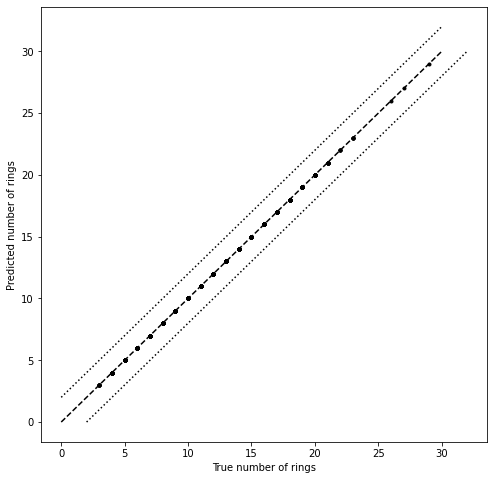

In [126]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(Y_train, predicted_train_y, '.k')
ax.plot([0, 30], [0, 30], '--k')
ax.plot([0, 30], [2, 32], ':k')
ax.plot([2, 32], [0, 30], ':k')
ax.set_xlabel('True number of rings')
ax.set_ylabel('Predicted number of rings')

from sklearn.metrics import r2_score
r2_score(Y_train,predicted_train_y)


# RandomForest

In [109]:
from sklearn.ensemble import RandomForestRegressor

model3= RandomForestRegressor(n_estimators=6)
model3.fit(X_train,Y_train)
predicted_test_y=model3.predict(X_test)


In [110]:
r2_score(Y_test,predicted_test_y)

0.47267484493887635

# SVM

In [89]:
from sklearn import svm
from sklearn.metrics import accuracy_score
svmModel=svm.SVC(kernel='linear', C=1, gamma=1) 
svmModel.fit(X_train, Y_train)
Y_pred=svmModel.predict(X_test)

In [90]:
r2_score(Y_test,Y_pred)

0.17367559257341325

In [115]:
# Save the trained model as a pickle string.
saved_model = pickle.dumps(model2)
  
# Load the pickled model
mod=pickle.loads(saved_model)
  
# Use the loaded pickled model to make predictions
mod.predict(X_test)

array([11.,  6., 20., ..., 12.,  8., 10.])

# Summary

In [ ]:
# 1. The models are developed using Logistic Regression, Decision Tree, Random Forest and SVM algortithms.
# 2. On comparing the r2 score, the Decision Tree Model is having a r2 score of 1.0 is saved and used for prediction